# Data Loading

In [249]:
import os

def get_file_names(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    # Filter out directories, leaving only files
    file_names = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    return file_names

folder_path = './marked_data'
file_names = get_file_names(folder_path)
print("File names in the folder:")
for file_name in file_names:
    print(file_name)

File names in the folder:
result_with_parameters_0.csv
result_with_parameters_1.csv
result_with_parameters_2.csv
result_with_parameters_3.csv
result_with_parameters_4.csv


In [250]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = list()
for i, file_name in enumerate(file_names):
    temp = pd.read_csv(f'./marked_data/{file_name}')
    temp = temp.drop(["index", ], axis=1)  # "past_OBV", "upper_ST", "lower_ST"
    data_for_analysis = temp
    y, X = temp["result"], temp.drop(["result"], axis=1)
    data.append([y, X])
    
data[2][1]

,close,open,high,low,volume,past_EMA,current_EMA,current_RSI,past_RSI,past_MACD,...,current_OBV,past_OBV,upper_BB,lower_BB,%K_StochRSI,upper_ST,lower_ST,ATR,up_Aroon,low_Aroon
0,270.22,270.22,270.61,270.20,70,0.062800,0.074286,52.549833,52.991143,0.023506,...,9.200000,-70.0,270.751797,269.990203,11.392405,274.176096,266.666977,1.383742,92.0,28.0
1,270.60,270.60,270.60,270.23,36,0.074286,0.052095,52.945640,52.549833,0.001364,...,8.400000,36.0,270.777576,269.989424,35.443038,274.176096,266.666977,1.382826,88.0,24.0
2,270.60,270.60,270.61,270.07,236,0.052095,0.032168,52.945640,52.945640,0.011346,...,12.533333,0.0,270.780016,270.043984,35.443038,274.176096,266.666977,1.393304,84.0,20.0
3,270.60,270.25,270.60,270.07,52,0.032168,0.014287,52.945640,52.945640,0.016663,...,7.733333,0.0,270.797415,270.042585,35.443038,274.176096,266.666977,1.402417,80.0,16.0
4,270.11,270.60,270.60,270.09,136,0.014287,0.040048,52.365237,52.945640,0.018739,...,3.466667,-136.0,270.805300,270.001700,0.000000,274.176096,266.666977,1.409590,76.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,276.07,276.06,276.10,276.06,930,-0.077712,-0.074969,51.333664,51.094821,-0.010906,...,48.133333,930.0,276.205463,276.010537,1.754386,274.053300,275.641429,1.031477,48.0,12.0
21565,276.06,276.07,276.19,276.06,2371,-0.074969,-0.071588,51.081684,51.333664,-0.009423,...,-168.466667,-2371.0,276.206069,276.007931,0.877193,274.053300,275.641429,1.038045,44.0,8.0
21566,276.10,276.13,276.14,276.06,204,-0.071588,-0.071903,52.032965,51.081684,-0.008656,...,-183.466667,204.0,276.206108,276.010892,4.424779,274.053300,275.641429,1.040842,40.0,4.0
21567,276.10,276.09,276.10,276.09,5,-0.071903,-0.072117,52.032965,52.032965,-0.005167,...,-128.266667,0.0,276.206026,276.013974,4.424779,274.053300,275.641429,1.038786,36.0,8.0


In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# get data
divided_data = list()
for data_train in data:
    divided_data.append(train_test_split(data_train[1], data_train[0], test_size=0.20, random_state = 2020, stratify=data_train[0]))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2020, stratify=y)

# Scale Data

In [252]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
for i, data_train in enumerate(divided_data):
    divided_data[i][0] = ss.fit_transform(data_train[0])
    divided_data[i][1] = ss.fit_transform(data_train[1])
    
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i, data_train in enumerate(divided_data):
    X_train_list.append(data_train[0])
    X_test_list.append(data_train[1])
    y_train_list.append(data_train[2])
    y_test_list.append(data_train[3])

X_train_scaled = np.concatenate(X_train_list, axis=0)
X_test_scaled = np.concatenate(X_test_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

X_train_scaled
# X_train_scaled = ss.fit_transform(X_train)
# X_test_scaled = ss.transform(X_test)
# y_train = np.array(y_train)

array([[ 0.37318128,  0.36978778,  0.37040421, ..., -0.61678256,
        -0.09445484,  1.275287  ],
       [ 0.0211219 ,  0.02290609,  0.02098994, ..., -0.23948667,
        -1.27617226,  1.51364122],
       [ 0.22253705,  0.22078362,  0.21880775, ..., -0.22169714,
         0.85091909, -1.34660941],
       ...,
       [-0.2070754 , -0.20122066, -0.20623739, ..., -0.30207281,
        -1.31274793,  1.39560403],
       [ 0.03192608,  0.05324079,  0.04213736, ..., -0.28148437,
         0.21817722, -1.30884228],
       [-0.63632681, -0.60788335, -0.61979917, ...,  0.59675935,
        -1.31274793,  0.92526554]])

# Over Sampling

In [253]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
#smote = SMOTE()

# Fit SMOTE to the training data
X_train_scaled, y_train = adasyn.fit_resample(X_train_scaled, y_train)
X_train_scaled

array([[ 0.37318128,  0.36978778,  0.37040421, ..., -0.61678256,
        -0.09445484,  1.275287  ],
       [ 0.0211219 ,  0.02290609,  0.02098994, ..., -0.23948667,
        -1.27617226,  1.51364122],
       [ 0.22253705,  0.22078362,  0.21880775, ..., -0.22169714,
         0.85091909, -1.34660941],
       ...,
       [ 0.12515244,  0.13702555,  0.12468607, ..., -1.19616265,
        -0.31619785,  1.48157615],
       [-1.01801573, -1.01549445, -1.01684367, ...,  0.40239832,
        -0.06502015, -1.09747205],
       [-0.62888065, -0.60351833, -0.61415353, ...,  0.55300273,
        -1.21102936,  0.9887431 ]])

# Undersempling

In [254]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
undersampler = RandomUnderSampler()

# Fit undersampler to the training data
X_train_scaled, y_train = undersampler.fit_resample(X_train_scaled, y_train)
X_train_scaled

array([[ 0.0211219 ,  0.02290609,  0.02098994, ..., -0.23948667,
        -1.27617226,  1.51364122],
       [ 0.22253705,  0.22078362,  0.21880775, ..., -0.22169714,
         0.85091909, -1.34660941],
       [ 0.33242153,  0.32973546,  0.32873315, ..., -0.30897924,
         0.73274735, -0.63154675],
       ...,
       [-1.40907218, -1.41010494, -1.42187675, ..., -0.61407139,
         1.29126909, -1.15441453],
       [-0.77389404, -0.76107471, -0.7666231 , ...,  1.10409227,
         0.68923111, -1.14920323],
       [ 0.0070283 ,  0.01423748, -0.01301873, ..., -0.58329678,
        -0.00511631,  0.79929882]])

# Learning

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))
display(rfc.score(X_test_scaled, y_test))

1.0

0.8091669215866218

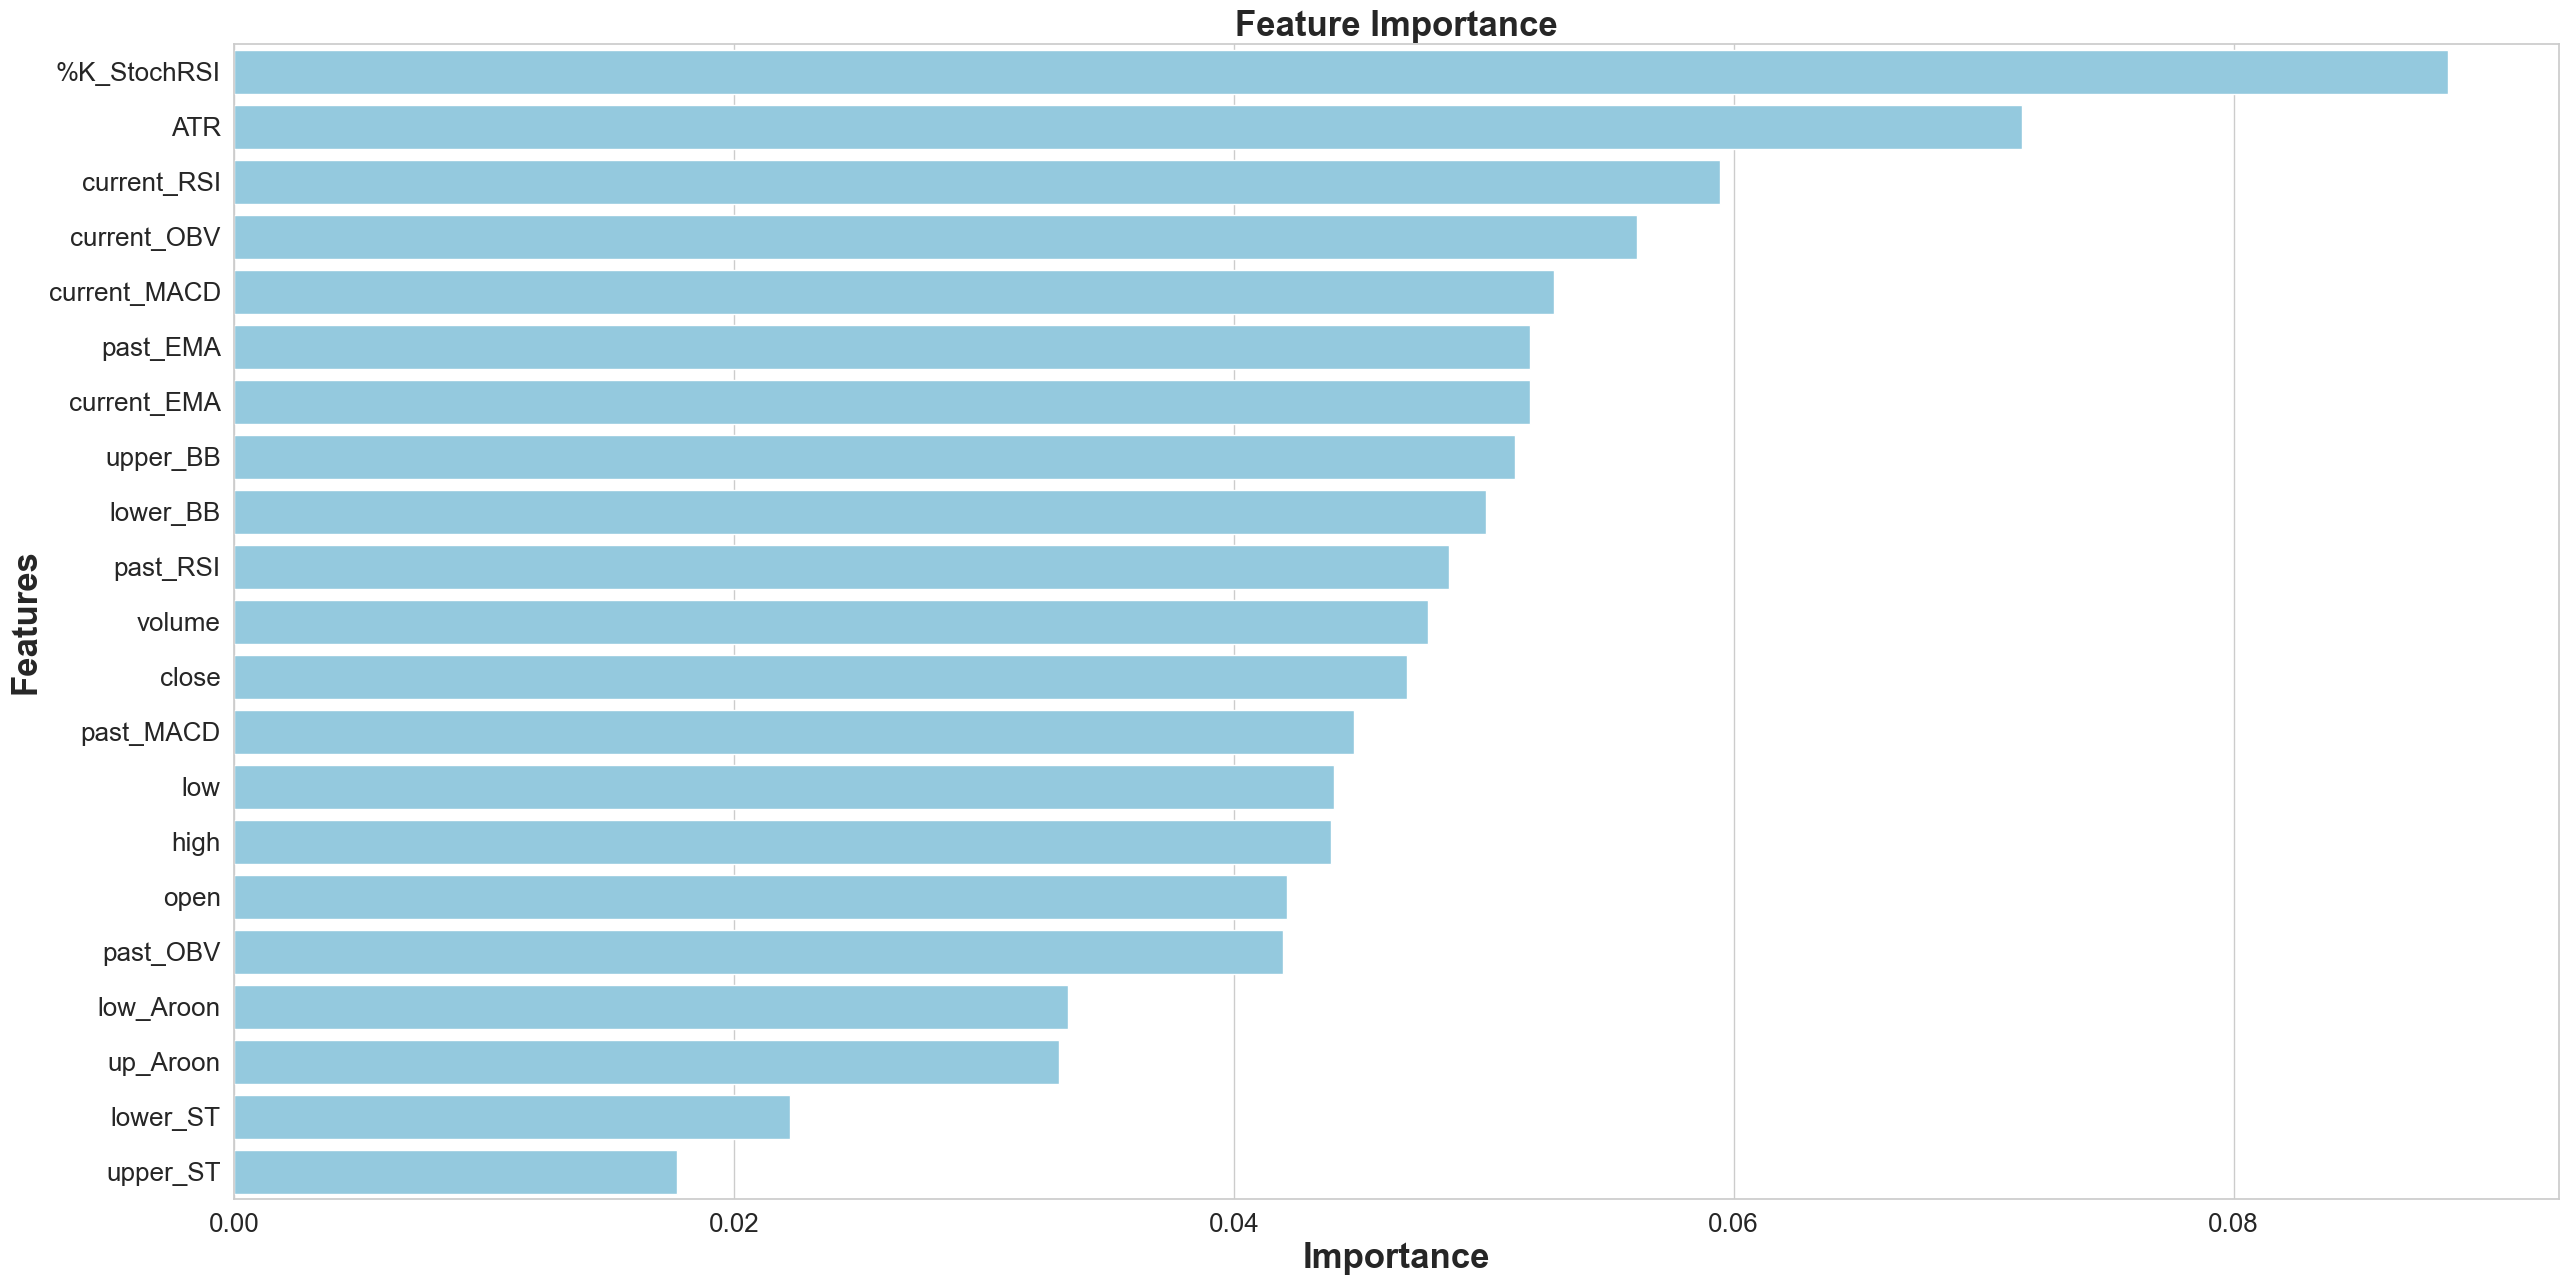

None

,Features,Gini-Importance
0,%K_StochRSI,0.088593
1,ATR,0.071533
2,current_RSI,0.059444
3,current_OBV,0.056143
4,current_MACD,0.052801
5,past_EMA,0.051868
6,current_EMA,0.051845
7,upper_BB,0.051260
8,lower_BB,0.050089
9,past_RSI,0.048631


In [246]:
from matplotlib import pyplot as plt
import seaborn as sns

feats = {}
for feature, importance in zip(data_for_analysis.drop("result", axis=1).columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

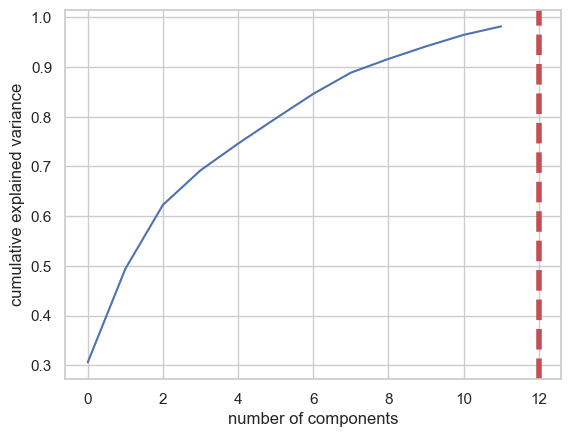

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.305894,0.305894
1,0.493865,0.187972
2,0.622471,0.128606
3,0.691904,0.069432
4,0.745630,0.053726
5,0.796203,0.050574
6,0.845650,0.049447
7,0.888266,0.042616
8,0.915942,0.027676
9,0.941152,0.025210


In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=12)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=12, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(12))

In [212]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100,
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [232]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
param_grid = {
    'n_estimators': 600,
    'min_samples_split': 23,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 15,
    'bootstrap': False
}

# Instantiate Random Forest classifier with specified hyperparameters
rf_classifier = RandomForestClassifier(**param_grid)

# Train the model (assuming X_train and y_train are your training data)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=2,
                       min_samples_split=23, n_estimators=600)

In [256]:
"""
just in case
{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}
"""

from sklearn.metrics import confusion_matrix, precision_score

# y_pred_probs = rfc.predict_proba(X_test_scaled)[:, 1]
# 
# new_threshold = 0.5  # Example: setting a higher threshold
# 
# # Adjust the predicted labels based on the new threshold
# y_pred = (y_pred_probs >= new_threshold).astype(int)
y_pred = rfc.predict(X_test_scaled)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display('Baseline Random Forest precision score', precision_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,9336,2488
actual 1,1255,6535


'Baseline Random Forest recall score'

0.8388960205391528

'Baseline Random Forest precision score'

0.7242602238723262

In [257]:
from joblib import dump

model_filename = 'random_forest_model.joblib'
dump(rfc, model_filename)

['random_forest_model.joblib']

In [209]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

# Create a Gradient Boosting Classifier instance
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train_scaled, y_train)

# Evaluate the model on the training and test data
train_score = gbm.score(X_train_scaled, y_train)
test_score = gbm.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 0.6883002838646435
Test Accuracy: 0.6696888017642735


In [211]:
# Calculate recall score on the test data
y_pred_test = gbm.predict(X_test_scaled)
recall = recall_score(y_test, y_pred_test)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_test), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
print("Test Recall Score:", recall)
display('Test precision score', precision_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,6675,633
actual 1,3411,1524


Test Recall Score: 0.3088145896656535


'Test precision score'

0.8127131027764247

In [186]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Instantiate the GBM classifier
gbm = GradientBoostingClassifier()

scorer = make_scorer(precision_score)

# Instantiate GridSearchCV with precision as the scoring metric
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on test set
test_score = grid_search.score(X_train_scaled, y_test)
print("Test Accuracy:", test_score)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


ValueError: Found input variables with inconsistent numbers of samples: [12243, 88996]

In [192]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on test set
test_score = grid_search.score(X_test_scaled, y_test)
print("Test Accuracy:", test_score)

y_pred_test = grid_search.predict(X_test_scaled)

display(conf_matrix_baseline)
print("Test Recall Score:", recall_score(y_test, y_pred_test))
display('Test precision score', precision_score(y_test, y_pred_test))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Test Accuracy: 0.15275634731378876


,predicted 0,predicted 1
actual 0,7439,3671
actual 1,161,972


Test Recall Score: 0.9611650485436893


'Test precision score'

0.15275634731378876